In [1]:
import numpy as np
import cv2
import imutils


In [2]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [3]:
!pip install pytesseract
import pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=dc2d90e06fb6cbb8d892de58e6eaad0cdcaba823fc202365dbbd1eb7b647eaba
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


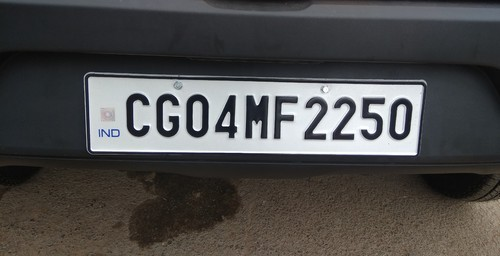

-1

In [5]:
from google.colab.patches import cv2_imshow
image = cv2.imread('1.jpeg')

# Resize the image - change width to 500
image = imutils.resize(image, width=500)

# Display the original image
cv2_imshow(image)
cv2.waitKey(0)

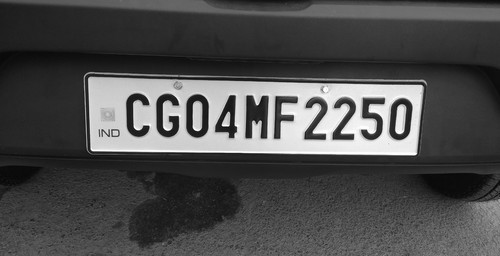

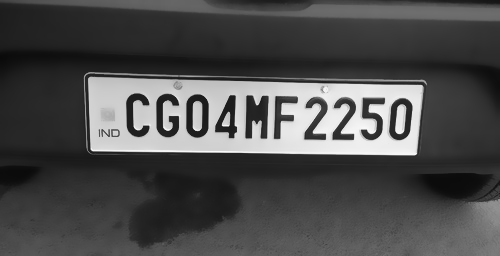

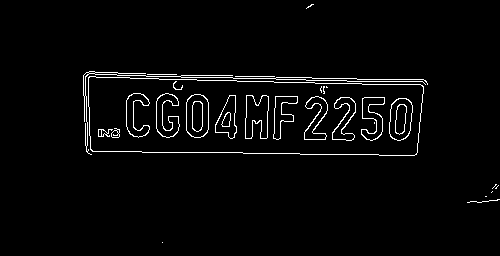

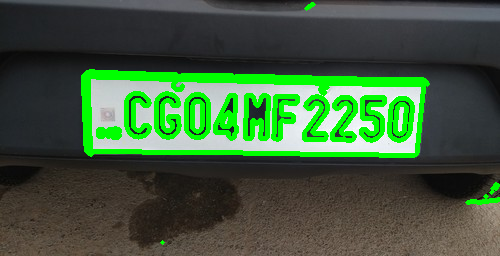

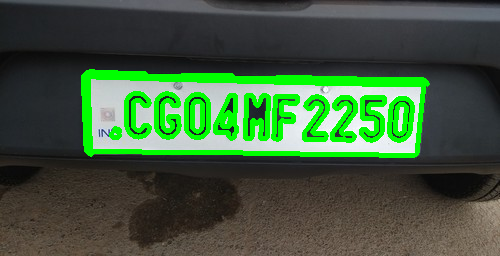

-1

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
cv2.waitKey(0)

# Noise removal with iterative bilateral filter(removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2_imshow(gray)
cv2.waitKey(0)

# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
cv2_imshow(edged)
cv2.waitKey(0)

# Find contours based on Edges
cnts, new  = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create copy of original image to draw all contours
img1 = image.copy()
cv2.drawContours(img1, cnts, -1, (0,255,0), 3)
cv2_imshow(img1)
cv2.waitKey(0)

#sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30]
NumberPlateCnt = None #we currently have no Number plate contour

# Top 30 Contours
img2 = image.copy()
cv2.drawContours(img2, cnts, -1, (0,255,0), 3)
cv2_imshow(img2)
cv2.waitKey(0)


In [7]:
count = 0
idx =7
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # print ("approx = ",approx)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour

            # Crop those contours and store it in Cropped Images folder
            x, y, w, h = cv2.boundingRect(c) #This will find out co-ord for plate
            new_img = gray[y:y + h, x:x + w] #Create new image
            cv2.imwrite('Cropped Images-Text' + str(idx) + '.png', new_img) #Store new image
            idx+=1

            break


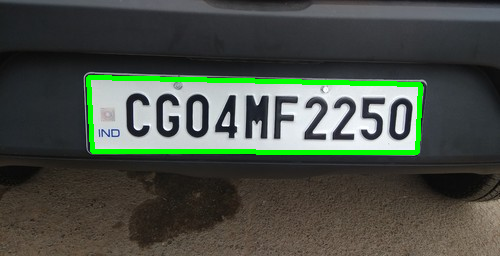

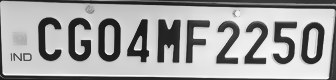

In [8]:
cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
cv2_imshow(image)
cv2.waitKey(0)

Cropped_img_loc = 'Cropped Images-Text7.png'
cv2_imshow(cv2.imread(Cropped_img_loc))



In [9]:
#TESSERACT FOR OCR


# Use tesseract to covert image into string
text = pytesseract.image_to_string(Cropped_img_loc, lang='eng')
print("Number is :", text)

cv2.waitKey(0) #Wait for user input before closing the i

Number is : .CGO4MF2250,



-1